# Original Graph

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: serif


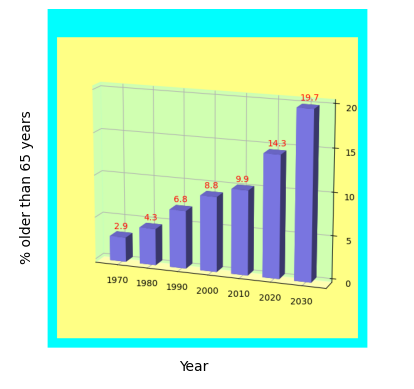

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['serif']


# Construct coordinate
X = np.arange(0, 10.5, 1.5)
Y = np.arange(0, 1, 1)
Z = np.array([[2.9], [4.3], [6.8], [8.8], [9.9], [14.3], [19.7]])

xx, yy = np.meshgrid(X, Y) # Grid coordinates
X, Y = xx.ravel(), yy.ravel() # Flat matrix
bottom = np.zeros_like(X) # Set the bottom value of the bar chart
Z = Z.ravel()

# The length and width of each column are 0.8.
width=height=0.8

# set canvas,convert it to 3D.
fig=plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Draw image
ax.bar3d(X, Y, bottom, width, height, Z, shade=True, color=(137/ 255., 132/255, 254 / 255.))

# Set axis label and scale.
plt.gca().set_box_aspect((12, 1, 9))
ax.set_xticks((np.arange(0, 10.5, 1.5)+0.4).tolist(), [1970, 1980, 1990, 2000, 2010, 2020, 2030])
ax.set_yticks([])
ax.set_zticks([0, 5, 10, 15, 20], [0, 5, 10, 15, 20])

# Adjust the window angle.Set the top view angle to 15 degrees, and set the image rotation to 270 degrees
ax.view_init(elev=15, azim=290)

# Set pane color.
ax.w_xaxis.set_pane_color((193. / 255., 1, 192. / 255.))
ax.w_yaxis.set_pane_color((193. / 255., 1, 192. / 255.))
ax.w_zaxis.set_pane_color((254. / 255., 254. / 255., 192. / 255.))
ax.patch.set_facecolor('#FFFF85')

# Set red number as text.
x_loc = 0
for i in [2.9, 4.3, 6.8, 8.8, 9.9, 14.3, 19.7]:
    ax.text(x_loc, 0.5, i + 0.5, str(i), color='red')
    x_loc += 1.5

# The window needs to be closed, otherwise the subsequent image drawing will be affected.
plt.savefig('test.png')
plt.close()

# Read saved image.
data = Image.open('test.png')

# Add blue and yellow background.
data = np.array(data)[:, 80:-80, :3].astype(float)
r_l_data = np.ones((data.shape[0], 15, 3)) * np.array([[[0, 254, 254]]])
data = np.hstack((r_l_data, data, r_l_data)) # Make tensors merge left and right.
d_data = np.ones((15, data.shape[1], 3)) * np.array([[[0, 254, 254]]])
u_data = np.ones((45, data.shape[1], 3)) * np.array([[[0, 254, 254]]])
data = np.vstack((u_data, data, d_data)) # Make tensors merge up and down.
r_l_data = np.ones((data.shape[0], 60, 3)) * np.array([[[255, 255, 255]]])
data = np.hstack((r_l_data, data, r_l_data))
d_data = np.ones((50, data.shape[1], 3)) * np.array([[[255, 255, 255]]]) # Make tensors with all 1 structures.
data = np.vstack((data, d_data))

# Set axis labels
plt.imshow(data.astype(int))
plt.text(270, 575, 'Year')
plt.text(15, 400, '% older than 65 years', rotation=90)
plt.axis('off')# It is used to cancel the display of the coordinate axis in the new image, because the coordinate axis is displayed by default when matplotlib draws an image.

# Here it is saved as a svg vector image, which can be magnified without distortion.
plt.savefig('original_image.svg')